# Last Python stretch: Recursive Feature Elimination

In [2]:
import sklearn
print(sklearn.__version__)

## for the sake of readability 
import warnings
warnings.filterwarnings("ignore") 

1.1.1


# Briefthrough

Pipeline is something new and worth looking at.

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

# RFE : Classification

Let's first look at RFE for classification, specifically DecisionTreeClassifier. 

## Import the necessary stuff

In [7]:
# evaluate RFE for classification
from numpy import mean, std
from numpy import std
from sklearn.datasets import make_classification

#impt 
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

#for evaluation sake only
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

Something to note in this approach are DecisionTreeClassifier and Pipeline. 

the last 2 import is not necessary ( it is just for demo purpose ) 


## Get your data (in my case is to fake it)

In [8]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

## Here we create the Pipeline for Classification

In [9]:

# create pipeline

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])


## Extra: Evaluating it (this is good for justification)

In [10]:
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.885 (0.035)


It is ok if your accuracy differs from mine. The data generated randomly.

## Prediction with RFE result

In [11]:
# make a prediction with an RFE pipeline
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
pipeline.fit(X, y)


Pipeline(steps=[('s',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=5)),
                ('m', DecisionTreeClassifier())])

In [31]:
# test out
testData = [[2.56999479,-0.13019997,3.16075093,-4.35936352,-1.61271951,-1.39352057,-2.48924933,-1.93094078,3.26130366,2.05692145]]
ypred = pipeline.predict(testData)
print('Predicted Class: %d' % (ypred))

Predicted Class: 1


# Revisit RFE : Regression (also extra)


Something bit different to look at is the Pipeline. Let's create Regression data first

In [32]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


## Let's just test whether it is accurate to use RFE or not

Like the previous section, we now can look at the accuracy of it. For this, we can make use MAE --> Mean Absolute Error as a benchmark.

In [33]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -27.263 (2.810)


Result may vary due to the nature of the algorithm. This is super EXTRA but You may refer to this for better understanding of WHY AM I GETTING DIFFERENT RESULT in ML T vT  https://machinelearningmastery.com/different-results-each-time-in-machine-learning/ 

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model 
pipeline.fit(X, y)


In [35]:
# test
testData = [[-2.02220122,0.31563495,0.82797464,-0.30620401,0.16003707,-1.44411381,0.87616892,-0.50446586,0.23009474,0.76201118]]
ypred = pipeline.predict(testData)
print('Predicted: %.3f' % (ypred))

Predicted: -84.288


# What is the best number of feature to select?

>2 0.718 (0.041)
>3 0.822 (0.035)
>4 0.877 (0.030)
>5 0.884 (0.031)
>6 0.891 (0.029)
>7 0.887 (0.031)
>8 0.881 (0.031)
>9 0.884 (0.023)


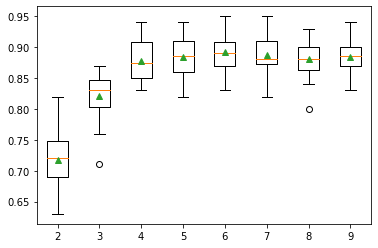

In [37]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(2, 10):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
    
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In this case, we can see that performance improves as the number of features increase and perhaps peaks around 5-to-9 as we might expect, given that only five features are relevant to the target variable.

# Automatically Select the Number of Features

It is actually possible to let the ML do everything for us. We can make use of a class call RFECV https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html 

In [14]:
#example code
# automatically choose the number of features
# rfe = RFECV(estimator=DecisionTreeClassifier())

The RFECV is configured just like the RFE class regarding the choice of the algorithm that is wrapped. Additionally, the minimum number of features to be considered can be specified via the “min_features_to_select” argument (defaults to 1) and we can also specify the type of cross-validation and scoring to use via the “cv” (defaults to 5) and “scoring” arguments (uses accuracy for classification)

In [13]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.880 (0.025)


# Which Features Were Selected
When using RFE, we may be interested to know which features were selected and which were removed.

This can be achieved by reviewing the attributes of the fit RFE object (or fit RFECV object). The “support_” attribute reports true or false as to which features in order of column index were included and the “ranking_” attribute reports the relative ranking of features in the same order.

The example below fits an RFE model on the whole dataset and selects five features, then reports each feature column index (0 to 9), whether it was selected or not (True or False), and the relative feature ranking

In [39]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 5.000
Column: 1, Selected False, Rank: 4.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 6.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 3.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 2.000


# VERY EXTRA: Let's look at the base algorithm and test different models

>lr 0.891 (0.030)
>per 0.846 (0.039)
>cart 0.890 (0.034)
>rf 0.864 (0.034)
>gbm 0.889 (0.031)


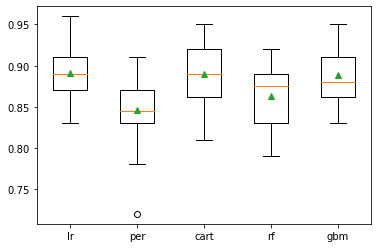

In [41]:

# explore the algorithm wrapped by RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    # lr
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    # perceptron
    rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
    # cart
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    # rf
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    # gbm
    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()